In [3]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595770 sha256=8b41440c3c557c7001bf19d3d9a11c632861f0365cf555756df37a7a714d8936
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\66\06\32\a9179cff2c93a45d140de3a5a4326e9709165681a43ff0f2e7
Successfully built pycountry


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install langdetect

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=de4b4e9b7ffca9903703c5e76c30f4e55c8ccba00cfab18d32b46720547803cf
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import webbrowser

In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
consumer_key = "XXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXX"

In [4]:
callback_uri = 'oob'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=q1wetgAAAAABB3E4AAABflZU_cY


In [6]:
webbrowser.open(redirect_url)

True

In [7]:
user_pin_input = input("What's the pin value? ")

What's the pin value? 5966122


In [8]:
auth.get_access_token(user_pin_input)

('4882418077-H17IYcDzcREjz2pEtuse1d5spmpWxFLETtteQyE',
 '0ikHwuh3Zq6WKMi0LyONvexVYnn2C8Lwjf2GnM1RkFxC3')

In [9]:
api = tweepy.API(auth)

In [10]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)


In [12]:
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input("Please enter how many tweets to analyze: "))

Please enter keyword or hashtag to search: attackontitan
Please enter how many tweets to analyze: 2500


In [14]:
tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


In [19]:
nltk.download('vader_lexicon')
for tweet in tweets:
 
 #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


In [21]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ",len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  589
negative number:  648
neutral number:  1262


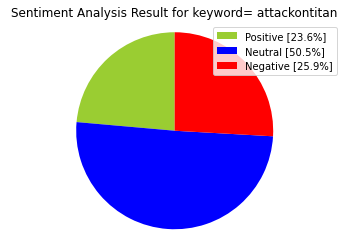

In [22]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()